# Binary Classification of Mushrooms

The dataset consists of 2 classes of mushrooms 'e' and 'p', defined by their distinct features. The features are also mentioned in the dataset. Aim is to use tensorflow library to perform classification and validate the performance of the model.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
mushroom=pd.read_csv('D:\\RUPA\\GIT - DA\\mushroom.csv')

In [3]:
mushroom.head()

,class,cap-shape,cap-surface,cap-color,ruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,e,x,f,n,f,n,f,w,n,b,...,y,w,p,NaN,n,o,p,w,v,NaN
1,p,NaN,y,g,t,NaN,f,c,b,k,...,s,n,c,p,w,n,e,NaN,y,g
2,e,b,y,n,t,n,f,c,NaN,n,...,s,p,NaN,p,w,o,p,b,y,w
3,e,x,g,g,t,n,f,w,b,n,...,s,p,NaN,p,w,n,n,NaN,NaN,d
4,e,NaN,f,NaN,t,n,a,w,n,n,...,k,NaN,w,p,w,NaN,l,w,v,d


In [4]:
mushroom.count()

class                       25986
cap-shape                   22513
cap-surface                 22507
cap-color                   22527
ruises                      22514
odor                        22536
gill-attachment             22505
gill-spacing                22587
gill-size                   22494
gill-color                  22418
stalk-shape                 22512
stalk-root                  22458
stalk-surface-above-ring    22478
stalk-surface-below-ring    22563
stalk-color-above-ring      22413
stalk-color-below-ring      22553
veil-type                   22489
veil-color                  22483
ring-number                 22497
ring-type                   22478
spore-print-color           22493
population                  22475
habitat                     22502
dtype: int64

In [5]:
#dropping NA values as we will have enough number of data points to train the model
mushroom.dropna(inplace=True)

In [6]:
mushroom.head()

,class,cap-shape,cap-surface,cap-color,ruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
41,e,x,f,u,t,y,f,w,b,w,...,s,w,w,p,w,o,l,y,y,d
57,e,f,g,w,f,p,f,w,b,p,...,k,g,w,p,w,o,n,h,n,g
60,e,x,f,n,f,s,a,c,b,p,...,y,c,p,p,w,t,e,b,s,w
83,p,x,f,e,f,s,f,c,b,g,...,s,w,p,p,n,o,l,r,a,p
115,p,k,s,w,f,f,f,c,n,n,...,s,w,p,p,o,o,n,n,a,p


In [7]:
mushroom.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1153 entries, 41 to 25985
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     1153 non-null   object
 1   cap-shape                 1153 non-null   object
 2   cap-surface               1153 non-null   object
 3   cap-color                 1153 non-null   object
 4   ruises                    1153 non-null   object
 5   odor                      1153 non-null   object
 6   gill-attachment           1153 non-null   object
 7   gill-spacing              1153 non-null   object
 8   gill-size                 1153 non-null   object
 9   gill-color                1153 non-null   object
 10  stalk-shape               1153 non-null   object
 11  stalk-root                1153 non-null   object
 12  stalk-surface-above-ring  1153 non-null   object
 13  stalk-surface-below-ring  1153 non-null   object
 14  stalk-color-above-ring    1

In [8]:
#obtain label column
outputs=mushroom.iloc[:,0]

In [9]:
#obtain feature columns
inputs=mushroom.iloc[:,1:]

In [10]:
outputs

41       e
57       e
60       e
83       p
115      p
        ..
25836    e
25875    p
25894    e
25938    e
25985    e
Name: class, Length: 1153, dtype: object

In [11]:
inputs.shape

(1153, 22)

In [12]:
outputs.shape

(1153,)

In [13]:
#reshaping to a usable form
outputs=outputs.values.reshape(-1,1)

In [14]:
outputs.shape

(1153, 1)

In [15]:
#check non-integer columns
inputs.select_dtypes(['object']).columns

Index(['cap-shape', 'cap-surface', 'cap-color', 'ruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [16]:
#since features are in the form of strings, encode them so that it can be used for training
dummies=pd.get_dummies(inputs[['cap-shape', 'cap-surface', 'cap-color', 'ruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat']],drop_first=True)

In [17]:
dummies

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
41,False,False,False,False,True,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
57,False,True,False,False,False,True,False,False,False,False,...,True,False,False,False,True,False,False,False,False,False
60,False,False,False,False,True,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,True
83,False,False,False,False,True,False,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
115,False,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25836,False,False,False,True,False,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
25875,False,False,True,False,False,False,False,True,False,False,...,True,False,False,False,False,False,False,True,False,False
25894,False,True,False,False,False,False,False,False,False,True,...,False,False,True,False,True,False,False,False,False,False
25938,False,False,False,False,True,True,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False


In [18]:
inputs=pd.concat([inputs.drop(['cap-shape', 'cap-surface', 'cap-color', 'ruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'], axis=1), dummies], axis=1)

In [19]:
inputs= inputs.astype(int)

In [20]:
inputs.head()

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
41,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
57,0,1,0,0,0,1,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
60,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
83,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
115,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [25]:
out_dum=pd.get_dummies(outputs[:,0], drop_first=True)

In [26]:
out_dum

,p
0,False
1,False
2,False
3,True
4,True
...,...
1148,False
1149,True
1150,False
1151,False


In [27]:
outputs=out_dum.astype(int)

In [28]:
outputs.head()

,p
0,0
1,0
2,0
3,1
4,1


In [29]:
import sklearn

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [31]:
#split data into training and testing datasets
x_train, x_test, y_train, y_test = train_test_split(inputs, outputs, test_size=0.2)

In [32]:
y_train.values.reshape(-1,1)
y_test.values.reshape(-1,1)

array([[0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
    

In [33]:
#scaling input features for easy calculation
scaler=MinMaxScaler()

In [34]:
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [35]:
x_train.shape, x_test.shape

((922, 95), (231, 95))

In [36]:
import tensorflow as tf

In [37]:
from tensorflow.keras.models import Sequential

In [38]:
from tensorflow.keras.layers import Dense, Dropout

In [39]:
model=Sequential()

In [40]:
#adding layers to the model
model.add(Dense(95, activation='relu'))
model.add(Dense(45, activation='relu'))
model.add(Dense(22, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [41]:
model.compile(loss='binary_crossentropy', optimizer='adam')

In [42]:
model.fit(x_train, y_train, epochs=15)

Epoch 1/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.6836
Epoch 2/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6215
Epoch 3/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5496
Epoch 4/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4383
Epoch 5/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4017
Epoch 6/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3535
Epoch 7/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3113
Epoch 8/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2795
Epoch 9/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2123
Epoch 10/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1815
Epoch 11/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1524
Epoch 12/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1041
Epoch 13/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0784
Epoch 14/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0611
Epoch 15/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0439


<Axes: >

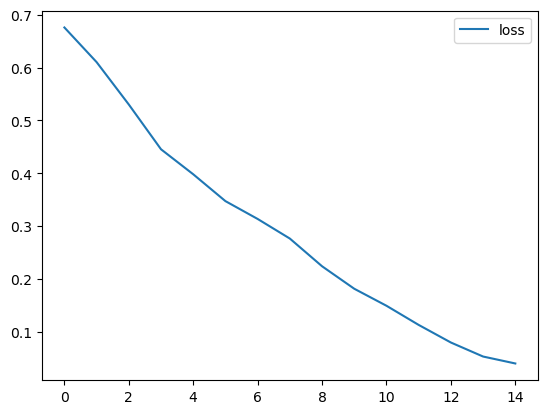

In [43]:
losses=pd.DataFrame(model.history.history)
losses.plot()

In [44]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [45]:
pred=model.predict(x_test)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


In [46]:
pred

array([[8.3853978e-01],
       [1.7792167e-02],
       [4.1581546e-03],
       [8.9274365e-01],
       [9.8886085e-01],
       [9.8794305e-01],
       [8.0753565e-03],
       [7.7074730e-01],
       [5.0220842e-04],
       [7.0730209e-01],
       [2.3623448e-02],
       [9.9407560e-01],
       [3.3818319e-01],
       [9.9419022e-01],
       [2.9049522e-01],
       [9.0014538e-07],
       [8.4524786e-01],
       [9.2218536e-01],
       [2.7882752e-03],
       [5.6853681e-03],
       [6.1877739e-01],
       [3.3086835e-04],
       [1.4421438e-01],
       [9.9458903e-01],
       [9.9450439e-01],
       [9.9278760e-01],
       [4.1959226e-02],
       [2.3657165e-03],
       [4.7801650e-01],
       [8.1537795e-01],
       [9.9749756e-01],
       [9.9139726e-01],
       [6.9690943e-01],
       [2.0644760e-01],
       [7.9017982e-04],
       [9.4534129e-01],
       [2.7610524e-02],
       [9.9309808e-01],
       [9.2669934e-02],
       [9.6710932e-01],
       [3.3474818e-01],
       [9.952498

In [48]:
#since the predicted values are decimals, we will do the rounding off to identify which class it belongs to
pred=np.array(pred>0.5)

In [49]:
pred

array([[ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [

In [50]:
y_test

,p
790,0
164,1
845,0
46,1
796,1
...,...
385,0
526,1
305,0
362,1


In [51]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.71      0.79      0.75       125
           1       0.71      0.61      0.66       106

    accuracy                           0.71       231
   macro avg       0.71      0.70      0.70       231
weighted avg       0.71      0.71      0.71       231



In [52]:
print(confusion_matrix(y_test, pred))

[[99 26]
 [41 65]]


In [53]:
#finding the predicted value for random x_test value
pred[59]

array([False])

In [65]:
#compare against y_test corresponding to the chosen x_test. Using iloc as y_test is pandas dataframe and pred is numpy.ndarray
y_test.iloc[59,0]

0

## Inference

1. The dataset is split to train test data.
2. x_train, x_test (inputs) were scaled.
3. Model is built and trained using x_train for 15 epochs. Adam optimizer is used to reduce the loss function which is binary cross entropy for this binary classification problem.
4. Trained model is used to predict the labels for x_test. Predicted values are compared with y_test via compatibility matrix and manual method.
5. 71% average is obtained for our model which is good, but can be improved by feeding in more data points, customizing learning_rate, training for more epochs etc.
6. However, steady decline in loss function is noticed which is a positive sign that our model is learning well.
7. Results of confusion matrix is also satisfactory.
8. We picked up random x_test, predicted corresponding label and compared with y_test. Same results were obtained.